<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2: Sistemas Lineales e Invariantes en el Tiempo
#### Nombre y Apellido: Matías Galperin

# Introducción Teórica
En este trabajo se analizan sistemas LTI (Lineales e Invariantes en el Tiempo) en tiempo discreto definidos por ecuaciones en diferencias. Una ecuación en diferencias de orden $N$ y $M$ se escribe como
\begin{equation}
\sum_{k=0}^{N} a_k\,y[n-k] \;=\; \sum_{k=0}^{M} b_k\,x[n-k],\qquad a_0=1,
\end{equation}
donde $x[n]$ es la entrada e $y[n]$ la salida. Esta formulación modela filtros digitales de dos tipos: FIR (si $a_k=0$ para $k\ge1$, sin realimentación) e IIR (con realimentación, $a_k\neq0$ para algún $k\ge1$).

## Respuesta al impulso y convolución
La respuesta al impulso $h[n]$ es la salida del sistema ante $x[n]=\delta[n]$. Para cualquier entrada, la salida puede obtenerse por convolución:
\begin{equation}
y[n] = (x*h)[n] = \sum_{m=-\infty}^{\infty} h[m]\;x[n-m].
\end{equation}
Operando en el dominio $z$, la función de transferencia es
\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{\sum_{k=0}^{N} a_k z^{-k}},
\end{equation}
y la respuesta en frecuencia se evalúa en el círculo unitario: $H(e^{j\Omega})=H(z)\big|_{z=e^{j\Omega}}$. Para una entrada senoidal de frecuencia discreta $\Omega_0=2\pi f_0/f_s$,
\begin{equation}
x[n]=A\sin(\Omega_0 n + \varphi)\quad\Rightarrow\quad
y_{\text{reg.}}[n]=A\,|H(e^{j\Omega_0})|\;\sin\!\big(\Omega_0 n+\varphi+\angle H(e^{j\Omega_0})\big),
\end{equation}
es decir, el sistema "escala" la amplitud por $|H|$ y desfasa por $\angle H$. Además puede existir un transitorio asociado a los polos.

## Causalidad y estabilidad BIBO
Un sistema es causal si $h[n]=0$ para $n<0$ (la salida solo depende del presente y pasado). Es BIBO-estable si $\sum_n |h[n]|<\infty$; en términos de $H(z)$, esto ocurre cuando todos los polos están estrictamente dentro del círculo unitario $(|z_p|<1)$.
- Los FIR causales son siempre BIBO-estables.  
- En IIR con realimentación, la estabilidad depende de la magnitud de la realimentación y de la ubicación de polos.

## Señales de energía vs señales de potencia
Para secuencias en tiempo discreto:
- **Energía:** $E=\sum_{n=-\infty}^{\infty} |x[n]|^2$.  
- **Potencia promedio:** $P=\lim_{N\to\infty}\frac{1}{2N+1}\sum_{n=-N}^{N}|x[n]|^2$.

Un pulso finito tiene energía finita y potencia promedio nula (señal de energía). Las señales periódicas (p. ej., senoidales) tienen energía infinita pero potencia promedio finita (señales de potencia). En simulación sobre una ventana finita, se reporta:

---

# Análisis y Desarrollo
## Parte 1 — Sistema IIR dado
Ecuación en diferencias:
\begin{equation}
y[n]=0.03\,x[n]+0.05\,x[n-1]+0.03\,x[n-2]+1.5\,y[n-1]-0.5\,y[n-2].
\end{equation}
Forma estándar $a_0y[n]+\dots=b_0x[n]+\dots$:
$\mathbf{b}=[0.03,\,0.05,\,0.03]$, $\mathbf{a}=[1,\,-1.5,\,0.5]$.

### Procedimiento
1. Entradas: se reutilizan las señales causales del TS1 (senoidal, escalón, pulso rectangular, ruido, suma de senos, etc.). Para cada una se documentan $f_s$ y $T$.  
2. Simulación: se aplica `lfilter(b, a, x)` para obtener $y[n]$ y se grafica junto a $x[n]$.  
3. Respuesta al impulso: se obtiene $h[n]$ filtrando un delta ($\delta[0]=1$) con `lfilter`. Dado un polo en $z=1$, $h[n]$ no decae completamente; se muestra en ventana finita $N_h$.  
4. Convolución: se calcula $y_{\text{conv}}=x*h$ y se recorta a $N$ muestras; se compara con `lfilter`.  
5. Métricas: se reportan $f_s$, $T$, $E$ y $P$ de $y[n]$. 

## Parte 2 — Sistemas con retardo $L=10$

### 2.a) $y[n]=x[n]+3\,x[n-10]$
- Coeficientes: $\mathbf{b}=[1,\,0,\dots,0,\,3]$ (longitud $L{+}1$, 3 en el índice 10), $\mathbf{a}=[1]$.  
- Respuesta al impulso: $h[n]=\delta[n]+3\,\delta[n-10]$ (dos impulsos).  
- Procedimiento:
  1. Entrada senoidal $x[n]=A\sin\!\big(2\pi f_0\,n/f_s\big)$ con $f_s$ y $T$ especificados.
  2. Cálculo de $y[n]$ con `lfilter(b,a,x)` y validación con convolución.
  3. Reporte de $f_s$, $T$, $E$ y $P$.

### 2.b) $y[n]=x[n]+3\,y[n-10]$
- Forma estándar: $y[n]-3\,y[n-10]=x[n]$ ⇒ $\mathbf{b}=[1]$, $\mathbf{a}=[1,\,0,\dots,0,\,-3]$.  
- Respuesta al impulso: $h[n]=\sum_{k=0}^{\infty}3^{k}\,\delta[n-10k]$ (impulsos cada 10 muestras, amplitud creciente).  
- Procedimiento:
  1. Misma senoidal de prueba con $f_s$ y $T$ explícitos.
  2. Cálculo de $y[n]$ con `lfilter(b,a,x)`.
  3. Reporte de $f_s$, $T$, $E$ y $P$..


**Extra: estabilidad.**
En sistemas LTI la estabilidad BIBO se cumple si todos los polos verifican $|z_p|<1$.
- Sistema Parte 1: $a(z)=1-1.5z^{-1}+0.5z^{-2}$ ⇒ polos en $z=\{1,\;0.5\}$; hay un polo en $z=1$ (no BIBO-estable).
- Sistema 2.a (FIR): estable (sin polos distintos de $z=0$).
- Sistema 2.b: $a(z)=1-3z^{-10}$ ⇒ $z^{10}=3$ ⇒ $|z|=3^{1/10}>1$ (inestable).
Esto se refleja en la energía/potencia medidas en la ventana: en los inestables crecen al aumentar $T$.

# Conclusiones
El trabajo permitió implementar y contrastar distintas formas de resolver sistemas LTI definidos por ecuaciones en diferencias: **filtrado directo** con coeficientes $(\mathbf{b},\mathbf{a})$ y convolución vía la respuesta al impulso $h[n]$. En todos los casos estables, ambas vías fueron numéricamente equivalentes, validando la teoría $y[n]=(x*h)[n]$.

En la Parte 1, el sistema IIR dado mostró en $h[n]$ un componente que no decae (polo en $z=1$), lo que explica que entradas con componente DC tiendan a hacer crecer la salida al ampliar la ventana. Para entradas de media cero (p. ej., seno puro), la salida exhibió el régimen esperado: la senoidal se mantiene a la misma frecuencia con **ganancia** $|H(e^{j\Omega_0})|$ y desfase $\angle H(e^{j\Omega_0})$. Tal como se pidió, en cada ensayo se documentaron la **frecuencia de muestreo** $f_s$, el tiempo de simulación $T$ y las métricas de **energía** y **potencia** de la salida, observando que la energía en ventana crece con $T$ mientras que la potencia promedio se estabiliza en señales periódicas.

En la Parte 2, el sistema FIR $y[n]=x[n]+3\,x[n-10]$ mostró un $h[n]$ con dos impulsos y un comportamiento de suma retardada: la salida es la superposición de la señal y su copia desplazada, generando patrones de interferencia (ganancias máximas y mínimas según la frecuencia). El sistema IIR con realimentación $y[n]=x[n]+3\,y[n-10]$ evidenció inestabilidad: su $h[n]$ crece geométricamente y la salida aumenta con el tiempo aun con entradas acotadas; en práctica, fue necesario acotar $T$ o la amplitud para evitar saturaciones numéricas.

En síntesis, se cumplieron las consignas: se graficaron las salidas para las señales del TS1, se obtuvo $h[n]$ y se reprodujeron salidas por convolución, y se reportaron $f_s$, $T$ y energía/potencia en cada caso.
### Indicar una opción:

Resolví la tarea con seguridad
**Resolví la tarea, pero tengo dudas**
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

¿Qué aprendiste al hacer esta tarea?

**Aprendí a cómo utilizar python para aplicaciones con distintos tipos de señales.**
¿Qué te quedó claro? ¿Qué te sigue costando?

**Me sigue costando pensar en las longitudes de cada parámetro en las funciones para lograr multiplicarlas entre sí o graficarlas, pero con más práctica va a ir mejorando. Tampoco tengo del todo claro el uso de todas las herramientas aún**

Indicar si se utilizó IA:

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

Conceptos teorícos

Gráficos

Conclusiones

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  9 15:28:46 2025

@author: Matias
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def potencia(y, fs, name="señal"):
    """
    Imprime y devuelve valores de la señal de salida:
    - fs (Hz)
    - Tiempo de simulación (s)
    - Potencia promedio (mean |y|^2)
    """
    N = len(y)
    T = N / fs
    potencia = np.mean(y**2)
    print(f"=== Valores de la salida: {name} ===")
    print(f"Frecuencia de muestreo fs: {fs:.0f} Hz")
    print(f"Tiempo de simulación: {T:.6f} s  ({T*1e3:.3f} ms)")
    print(f"Potencia promedio (RMS^2): {potencia:.6g}W")
    return {"fs": fs, "T": T, "potencia": potencia}

def energía(y, fs, name="señal"):
    """
    Imprime y devuelve valores de la señal de salida:
    - fs (Hz)
    - Tiempo de simulación (s)
    - Energía (sum |y|^2)
    """
    N = len(y)
    T = N / fs
    energia = np.sum(y**2)
    print(f"=== Métricas de salida: {name} ===")
    print(f"Frecuencia de muestreo fs: {fs:.0f} Hz")
    print(f"Tiempo de simulación: {T:.6f} s  ({T*1e3:.3f} ms)")
    print(f"Energía: {energia:.6g}J")
    return {"fs": fs, "T": T, "energia": energia}

=== Valores de la salida: senoidal ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.005000 s  (5.000 ms)
Potencia promedio (RMS^2): 1.07518W
=== Valores de la salida: senoidal amplificada ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.005000 s  (5.000 ms)
Potencia promedio (RMS^2): 1.35463W
=== Valores de la salida: senoidal modulada ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.005000 s  (5.000 ms)
Potencia promedio (RMS^2): 0.394852W
=== Valores de la salida: senoidal modulada recortada ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.005000 s  (5.000 ms)
Potencia promedio (RMS^2): 0.222104W
=== Valores de la salida: cuadrada ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.005000 s  (5.000 ms)
Potencia promedio (RMS^2): 0.849642W
=== Métricas de salida: pulso ===
Frecuencia de muestreo fs: 50000 Hz
Tiempo de simulación: 0.001000 s  (1.000 ms)
Energía: 54.2375J


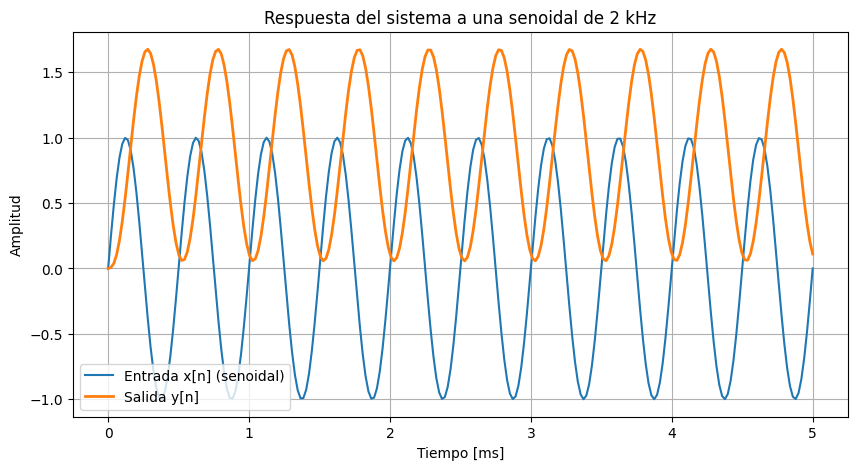

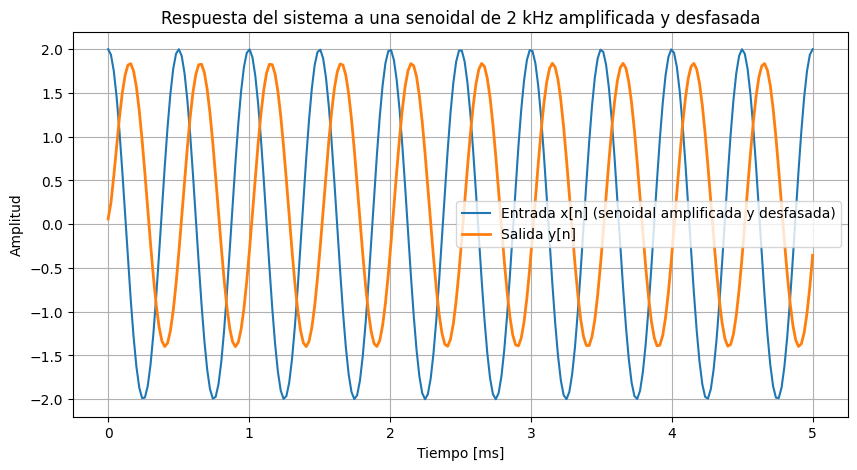

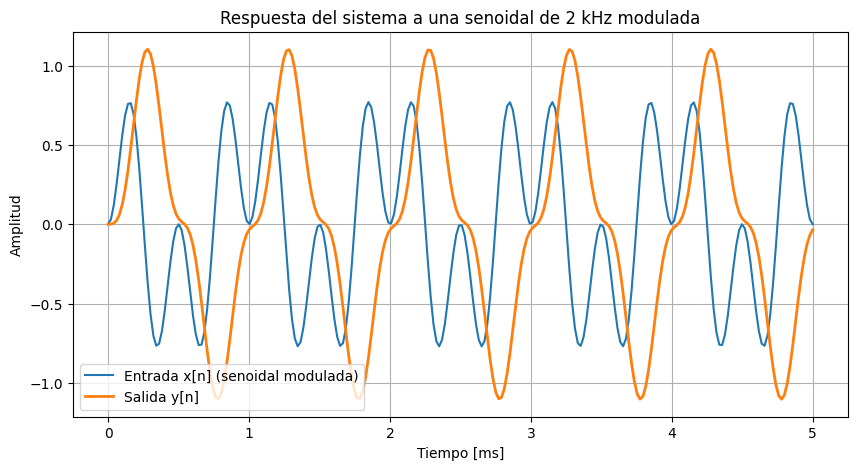

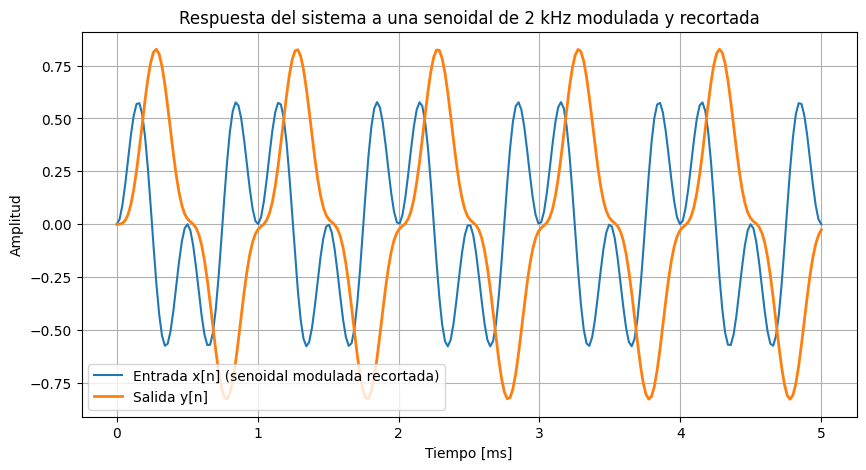

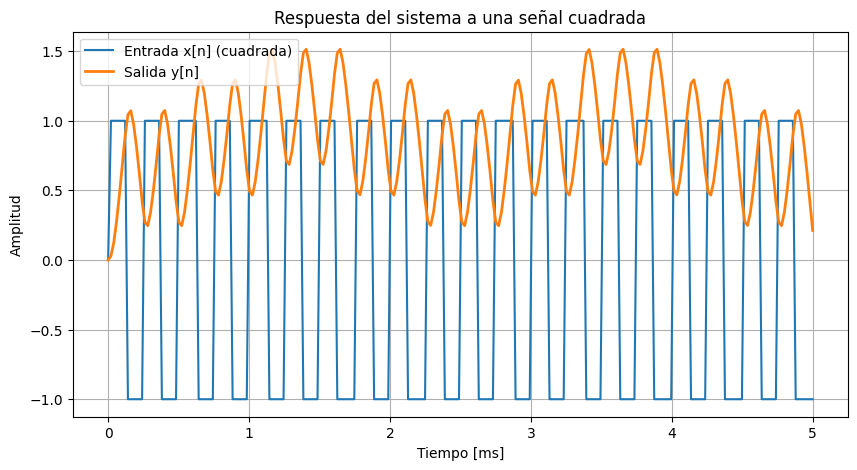

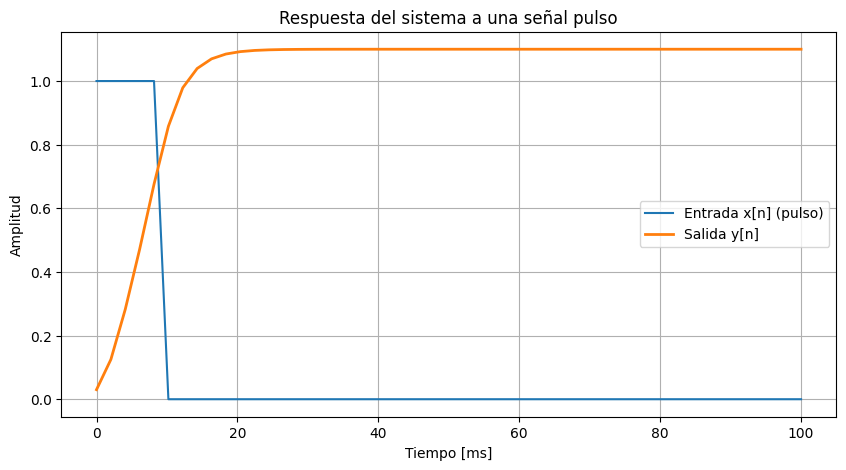

In [7]:
#%% Punto 1:

# Genero funciones
# Parámetros
frecuencia_senoidal = 2000  # 2 KHz
amplitud = 1
duracion = 0.005  # 5 ms
tasa_muestreo = 50000  # 50 kHz
    
# Generación del tiempo
t = np.linspace(0, duracion, int(tasa_muestreo * duracion), endpoint=True)
    
# Generación de la señal sinusoidal
señal_senoidal = amplitud * np.sin(2 * np.pi * frecuencia_senoidal * t)
# Generación de la señal ampliada y desafasada
fase = np.pi / 2  # Desfase de π/2 (90 grados)
amplificacion = 2  # Amplificación de la señal
señal_amplificada = amplificacion * amplitud * np.sin(2 * np.pi * frecuencia_senoidal * t + fase)
# Generación señal modulada
frecuencia_moduladora = frecuencia_senoidal/2  # Mitad de la señal original
amplitud_moduladora = 1
duracion = 0.001  # 10 ms
señal_modulada = (amplitud_moduladora * np.sin(2 * np.pi * frecuencia_moduladora * t)) * señal_senoidal
# Generación señal recortada
señal_recortada=0.75 * señal_modulada
# Generación señal cuadrada de 4 kHz
frecuencia_cuadrada = 4000  # 4 KHz
señal_cuadrada = amplitud * np.sign(np.sin(2 * np.pi * frecuencia_cuadrada * t))
# Generación de señal pulso rectangular de 10 ms
duracion_pulso = 0.01  # 10 ms
t_pulso = np.linspace(0, 0.1, int(tasa_muestreo * duracion), endpoint=True)
señal_pulso = np.zeros_like(t_pulso)
señal_pulso[(t_pulso >= 0) & (t_pulso < duracion_pulso)] = 1  # Pulso rectangular de 10 ms

# Coeficientes del sistema
b = [0.03, 0.05, 0.03]   # Numerador (entrada)
a = [1, -1.5, 0.5]       # Denominador (salida)

# Salida
y_senoidal = lfilter(b, a, señal_senoidal)
potencia(y_senoidal, 50000, name="senoidal")
y_amplificada = lfilter(b, a, señal_amplificada)
potencia(y_amplificada, 50000, name="senoidal amplificada")
y_modulada = lfilter(b, a, señal_modulada)
potencia(y_modulada, 50000, name="senoidal modulada")
y_recortada = lfilter(b, a, señal_recortada)
potencia(y_recortada, 50000, name="senoidal modulada recortada")
y_cuadrada = lfilter(b, a, señal_cuadrada)
potencia(y_cuadrada, 50000, name="cuadrada")
y_pulso = lfilter(b, a, señal_pulso)
energía(y_pulso, 50000, name="pulso")

# Graficar senoidal
plt.figure(figsize=(10,5))
plt.plot(t*1000, señal_senoidal, label="Entrada x[n] (senoidal)")
plt.plot(t*1000, y_senoidal, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una senoidal de 2 kHz")
plt.legend()
plt.grid(True)
plt.show()

# Graficar senoidal amplificada
plt.figure(figsize=(10,5))
plt.plot(t*1000, señal_amplificada, label="Entrada x[n] (senoidal amplificada y desfasada)")
plt.plot(t*1000, y_amplificada, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una senoidal de 2 kHz amplificada y desfasada")
plt.legend()
plt.grid(True)
plt.show()

# Graficar senoidal modulada
plt.figure(figsize=(10,5))
plt.plot(t*1000, señal_modulada, label="Entrada x[n] (senoidal modulada)")
plt.plot(t*1000, y_modulada, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una senoidal de 2 kHz modulada")
plt.legend()
plt.grid(True)
plt.show()

# Graficar senoidal modulada recortada
plt.figure(figsize=(10,5))
plt.plot(t*1000, señal_recortada, label="Entrada x[n] (senoidal modulada recortada)")
plt.plot(t*1000, y_recortada, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una senoidal de 2 kHz modulada y recortada")
plt.legend()
plt.grid(True)
plt.show()

# Graficar cuadrada
plt.figure(figsize=(10,5))
plt.plot(t*1000, señal_cuadrada, label="Entrada x[n] (cuadrada)")
plt.plot(t*1000, y_cuadrada, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una señal cuadrada")
plt.legend()
plt.grid(True)
plt.show()

# Graficar pulso
plt.figure(figsize=(10,5))
plt.plot(t_pulso*1000, señal_pulso, label="Entrada x[n] (pulso)")
plt.plot(t_pulso*1000, y_pulso, label="Salida y[n]", linewidth=2)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Respuesta del sistema a una señal pulso")
plt.legend()
plt.grid(True)
plt.show()

**Primer gráfico:** se observa una ganancia distinta de 1: la salida tiene picos alrededor de 1.7 (±0.1). Además, se observa un desfase entre señales: la salida está corrida en el tiempo respecto de la entrada. El corrimiento visual es de ~0.15 ms, lo que equivale a un ángulo de ~100–135° según el fs que usado. En los 5 ms que graficados (que son 10 períodos) casi no se perciben transitorios; la salida es prácticamente una senoidal pura a la misma frecuencia, solo amplificada y desfazada (comportamiento típico LTI).

**Segundo gráfico:** en este caso se observa la misma salida, pero comparada contra una senoidal “de referencia” que ya viene amplificada y con el desfase correspondientes. El encastre entre ambas curvas confirma la propiedad de régimen senoidal de los LTI. Es decir, el sistema no cambia la frecuencia, solo escala la amplitud.

**Tercer gráfico:** la entrada (azul) es una AM: una senoidal de 2 kHz modulada en amplitud. La salida (naranja) mantiene la misma frecuencia portadora y la misma envolvente, pero está amplificada y desfasada. Esto se interpreta en AM senoidal con frecuencia de modulación el espectro tiene tres líneas principales. Un sistema LTI responde frecuencia por frecuencia: cada componente se escala por 𝐻 y se desfasa por ∠𝐻, por eso la salida conserva la forma modulada pero con envolvente más “redondeada” y termina suavizando el detalle fino de la envolvente y amplificando lo de baja frecuencia.

**Cuarto gráfico:** la salida (naranja) es igual a la del gráfico anterior pero también está recortada en amplitud como la entrada.

**Quinto gráfico:** la salida (naranja) es más suave que la cuadrada: los bordes se redondean y la forma se acerca a una senoidal con ganancia y desfase respecto de la entrada. La envolvente de la salida sube lentamente a lo largo de la ventana: los picos van creciendo. El sistema actúa como suavizador: amplifica la componente fundamental cerca de la frecuencia de la señal de entrada y atenúa buena parte de las armónicas altas

**Sexto gráfico:** mientras dura el pulso, la salida sube suavemente (respuesta tipo paso con borde redondeado) y alcanza un valor constante. Cuando el pulso termina y la entrada vuelve a 0, la salida no vuelve a cero, queda en un nivel permanente. El modo estable (polo en 0.5) da la curva de subida exponencial. El polo en 1 hace que el sistema “integre” el pulso, al finalizar, conserva un valor proporcional al área del pulso (memoria). Por eso queda un offset fijo.

Error máx. entre convolución y lfilter: 3.3306690738754696e-15


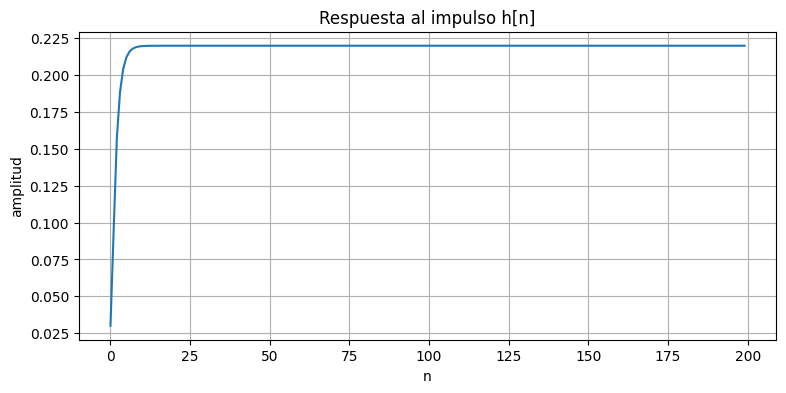

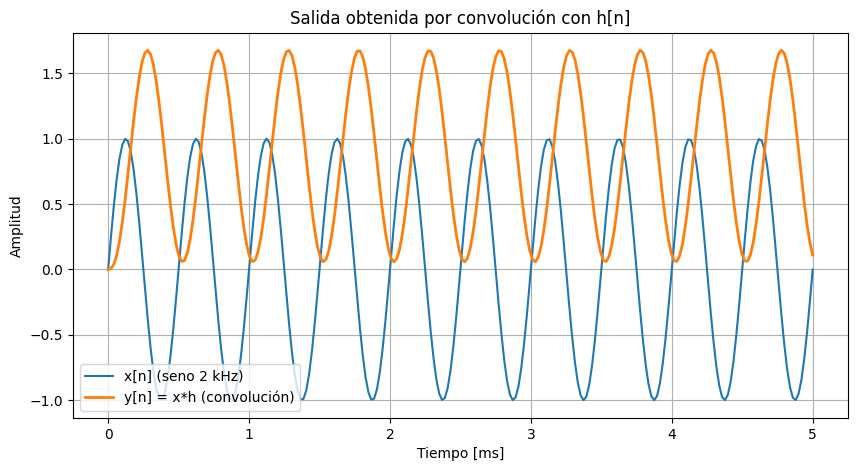

In [8]:
#%% Respuesta al impulso y señal de salida para la senoidal

# Respuesta al impulso h[n] (ventana de N muestras)
N = 400
delta = np.zeros(N); delta[0] = 1.0
h = lfilter(b, a, delta)

# Salida por convolución con h[n] (recortar a len(x))
y_conv_full = np.convolve(señal_senoidal, h, mode='full')
y_conv = y_conv_full[:len(señal_senoidal)]

# Comparo contra lfilter directo
err = np.max(np.abs(y_conv - y_senoidal))
print("Error máx. entre convolución y lfilter:", err)

# Graficos
plt.figure(figsize=(9,4))
plt.plot(h[:200])
plt.title("Respuesta al impulso h[n]")
plt.xlabel("n"); plt.ylabel("amplitud"); plt.grid(True)

plt.figure(figsize=(10,5))
plt.plot(t*1e3, señal_senoidal, label="x[n] (seno 2 kHz)")
plt.plot(t*1e3, y_conv, label="y[n] = x*h (convolución)", linewidth=2)
plt.xlabel("Tiempo [ms]"); plt.ylabel("Amplitud")
plt.title("Salida obtenida por convolución con h[n]")
plt.legend(); plt.grid(True)
plt.show()

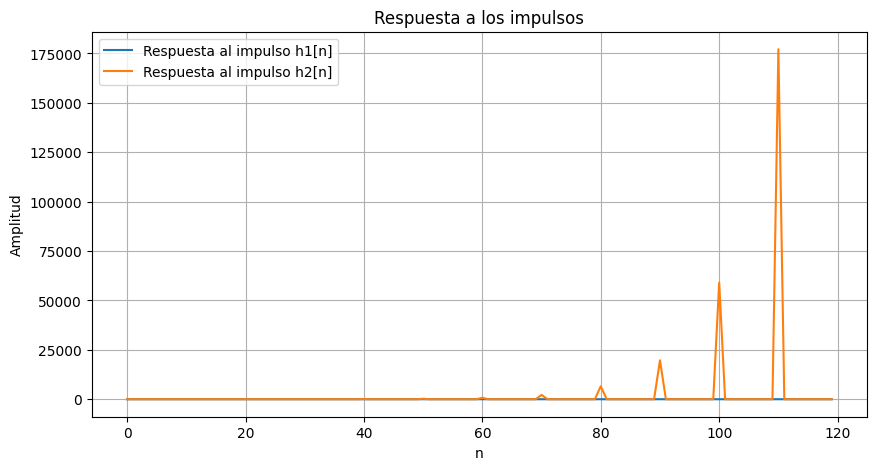

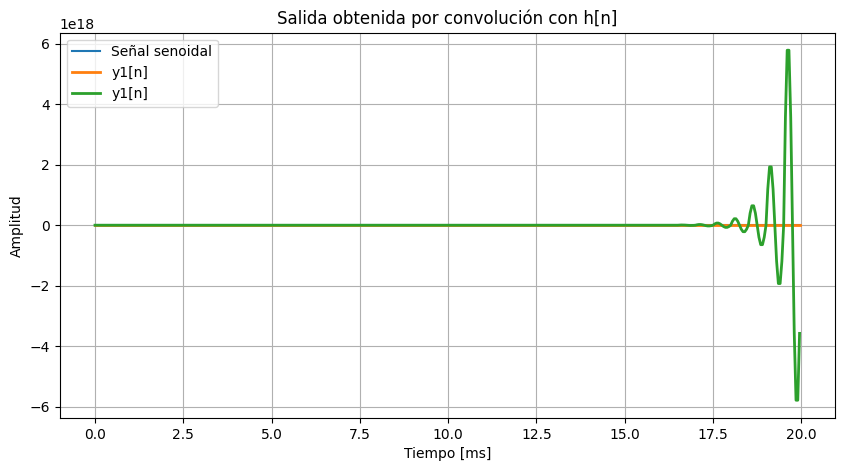

In [4]:
#%% Punto 2
fs = 20000
f0 = 2000
A  = 1.0
dur = 0.02
t = np.arange(0, dur, 1/fs)
x = A*np.sin(2*np.pi*f0*t)

L = 10  # retardo

# Sistema A: y[n] = x[n] + 3 x[n-L]
b1 = np.zeros(L+1); b1[0] = 1.0; b1[L] = 3.0
a1 = np.array([1.0])

# Sistema B: y[n] - 3 y[n-L] = x[n]
b2 = np.array([1.0])
a2 = np.zeros(L+1); a2[0] = 1.0; a2[L] = -3.0

# Respuesta al impulso (N muestras)
N = 120
delta = np.zeros(N); delta[0] = 1.0
h1 = lfilter(b1, a1, delta)
h2 = lfilter(b2, a2, delta)  # verás 1, 0...0, 3, 0...0, 9, ... (crece)

# Salida ante senoidal
y1 = lfilter(b1, a1, x)      # estable
y2 = lfilter(b2, a2, x)      # inestable: puede “explotar”; si hace falta, reduce dur

# Grafico ambas respuestas a los impulsos
plt.figure(figsize=(10,5))
plt.plot(h1[:120], label="Respuesta al impulso h1[n]")
plt.plot(h2[:120], label="Respuesta al impulso h2[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title("Respuesta a los impulsos")
plt.legend()
plt.grid(True)
plt.show()

# Grafico respuestas a la senoidal
plt.figure(figsize=(10,5))
plt.plot(t*1000, x, label="Señal senoidal")
plt.plot(t*1000, y1, label="y1[n]", linewidth=2)
plt.plot(t*1000, y2, label="y1[n]", linewidth=2)
plt.xlabel("Tiempo [ms]"); plt.ylabel("Amplitud")
plt.title("Salida obtenida por convolución con h[n]")
plt.legend(); plt.grid(True)
plt.show()